In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [103]:
df= pd.read_csv(r'C:\Users\user\Downloads\cubic_zirconia.csv')

In [104]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [105]:
del(df['Unnamed: 0'])

In [106]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [109]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


In [234]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [13]:
df = pd.DataFrame(X.fit_transform(df),columns=df.columns[0:])

In [23]:
df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.043201,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,-0.185171,1.761801,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
1,-0.980405,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,5.400410,-0.567601,-0.452011,...,-0.472222,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663
2,0.212721,0.321944,1.139736,0.274832,0.331406,0.335747,0.583753,-0.185171,-0.567601,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368
3,-0.792017,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
4,-1.022269,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663


**Check for Null Values**

In [24]:
df.isnull().sum()

carat              0
depth            697
table              0
x                  0
y                  0
z                  0
price              0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
cut_Good           0
cut_Ideal          0
cut_Premium        0
cut_Very Good      0
dtype: int64

**% Null values**

In [25]:
df.isnull().sum()/df.isnull().sum().sum()*100

carat              0.0
depth            100.0
table              0.0
x                  0.0
y                  0.0
z                  0.0
price              0.0
clarity_IF         0.0
clarity_SI1        0.0
clarity_SI2        0.0
clarity_VS1        0.0
clarity_VS2        0.0
clarity_VVS1       0.0
clarity_VVS2       0.0
color_E            0.0
color_F            0.0
color_G            0.0
color_H            0.0
color_I            0.0
color_J            0.0
cut_Good           0.0
cut_Ideal          0.0
cut_Premium        0.0
cut_Very Good      0.0
dtype: float64

In [26]:
df.shape

(26967, 24)

In [27]:
#Univariate Analysis 
##In order to do Univariate analysis let us take a column of data - 'carat'
## Storing the carat column in a variable in "data"

In [28]:
data = df['carat']

In [29]:
len(data)

26967

In [30]:
# checking for missing values

data.isnull().sum()

0

(array([7.590e+02, 5.351e+03, 2.642e+03, 2.439e+03, 1.287e+03, 1.772e+03,
        1.477e+03, 3.130e+02, 1.369e+03, 2.978e+03, 1.226e+03, 1.236e+03,
        6.050e+02, 2.750e+02, 7.900e+01, 1.345e+03, 2.850e+02, 2.910e+02,
        8.900e+01, 2.800e+01, 1.460e+02, 5.710e+02, 1.240e+02, 1.040e+02,
        5.500e+01, 3.000e+01, 3.500e+01, 2.000e+01, 1.000e+01, 5.000e+00,
        1.000e+00, 0.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.25252158e+00, -1.07250607e+00, -8.92490565e-01, -7.12475056e-01,
        -5.32459547e-01, -3.52444038e-01, -1.72428529e-01,  7.58698009e-03,
         1.87602489e-01,  3.67617998e-01,  5.47633507e-01,  7.27649016e-01,
         9.07664525e-01,  1.08768003e+00,  1.26769554e+00,  1.44771105e+00,
         1.62772656e+00,  1.80774207e+00,  1.98775758e+00,  2.16777309e+

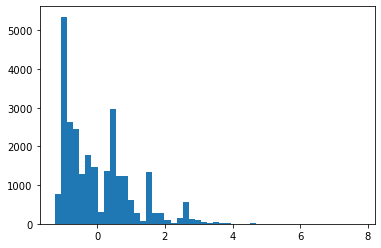

In [31]:
# The below code plots a histrogram 
plt.hist(data, bins=50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

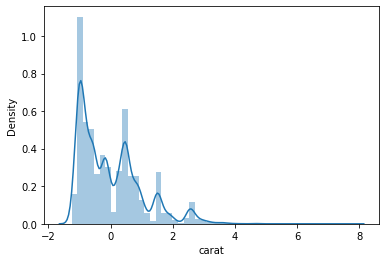

In [32]:
sns.distplot(data)
# plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

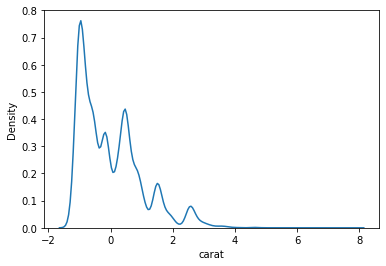

In [33]:
sns.distplot(data, hist=False) # removes the histogram and shows only the frequency

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

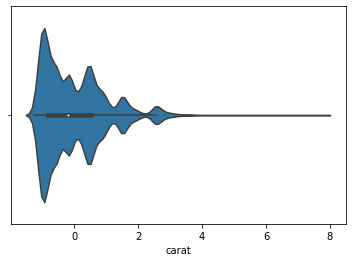

In [34]:
sns.violinplot(data) # plots a violin plt

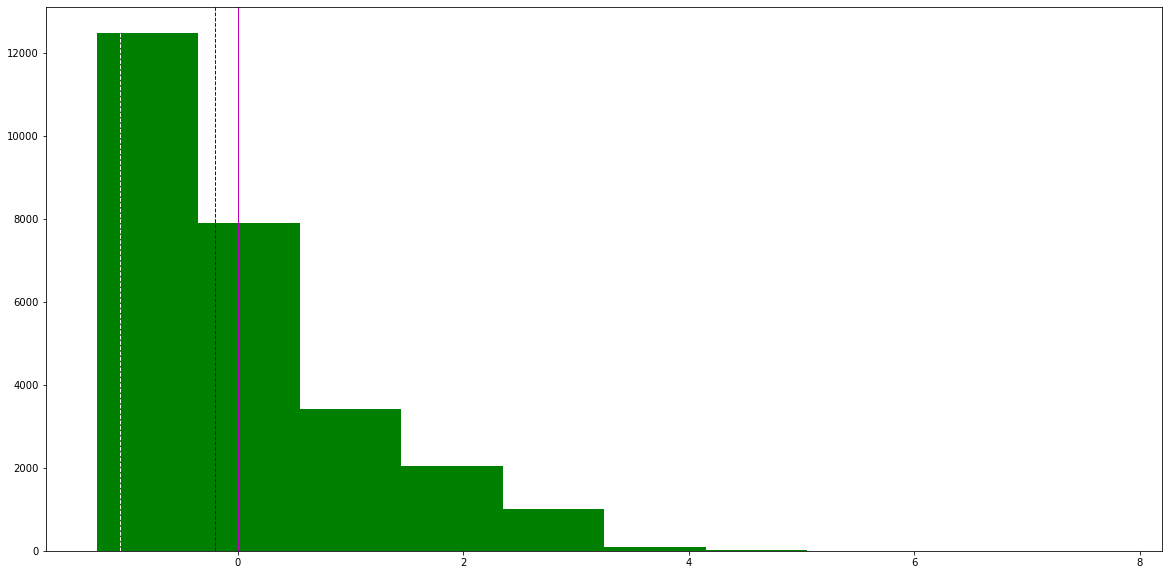

In [35]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='g') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

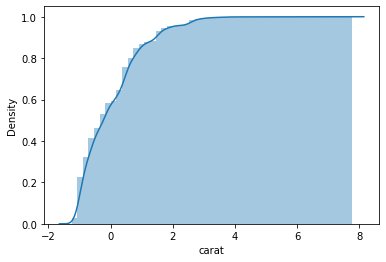

In [36]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [37]:
#Performing Univariate analysis on another varibale "table"
##I'm saving the table data in data1

In [38]:
data1 = df['table']

In [39]:
len(data1)

26967

In [40]:
# checking for missing values

data1.isnull().sum()

0

(array([2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 3.000e+01,
        2.680e+02, 4.800e+01, 1.373e+03, 5.100e+01, 3.183e+03, 5.036e+03,
        4.100e+01, 4.807e+03, 2.300e+01, 4.276e+03, 3.311e+03, 1.700e+01,
        2.091e+03, 2.000e+01, 1.155e+03, 6.260e+02, 1.200e+01, 2.800e+02,
        0.000e+00, 1.320e+02, 7.100e+01, 0.000e+00, 5.500e+01, 0.000e+00,
        2.200e+01, 1.500e+01, 0.000e+00, 8.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.78852113, -3.51970712, -3.25089311, -2.9820791 , -2.71326509,
        -2.44445108, -2.17563707, -1.90682306, -1.63800905, -1.36919504,
        -1.10038103, -0.83156702, -0.56275301, -0.293939  , -0.02512499,
         0.24368902,  0.51250303,  0.78131704,  1.05013105,  1.31894506,
         1.58775907,  1.85657308,  2.12538709,  2.3942011 ,  2.66301511,
         2.

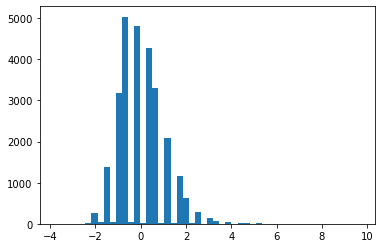

In [41]:
# The below code plots a histrogram 
plt.hist(data1, bins=50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

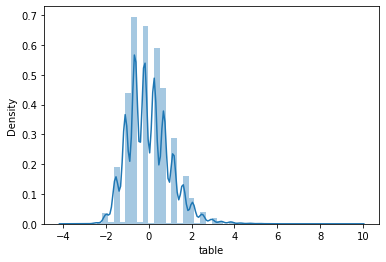

In [42]:
sns.distplot(data1)
# plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

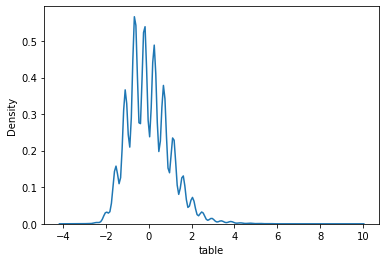

In [43]:
sns.distplot(data1, hist=False) # removes the histogram and shows only the frequency

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

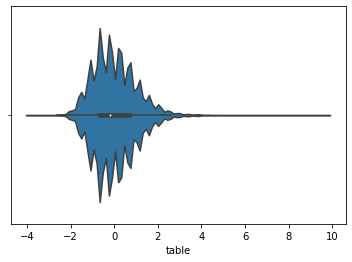

In [44]:
sns.violinplot(data1) # plots a violin plt

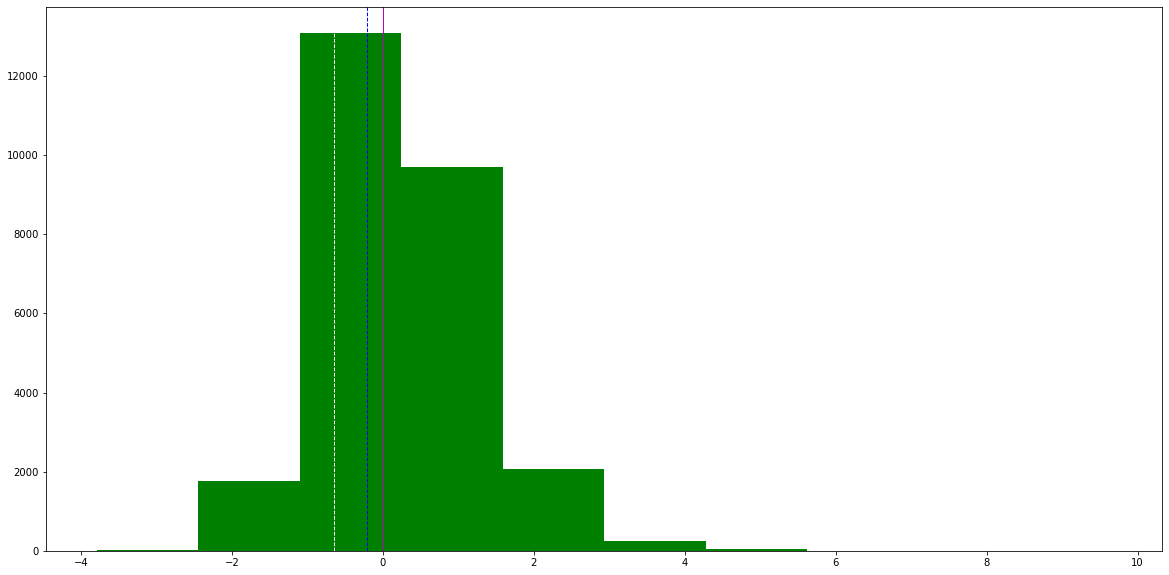

In [45]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data1, color='g') # plots a simple histogram
plt.axvline(data1.mean(), color='m', linewidth=1)
plt.axvline(data1.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data1.mode()[0], color='w', linestyle='dashed', linewidth=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

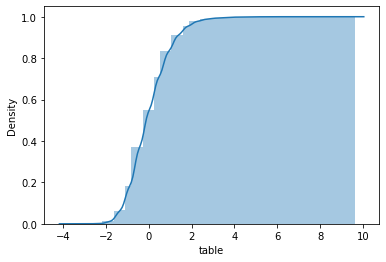

In [46]:
sns.distplot(data1, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

<AxesSubplot:>

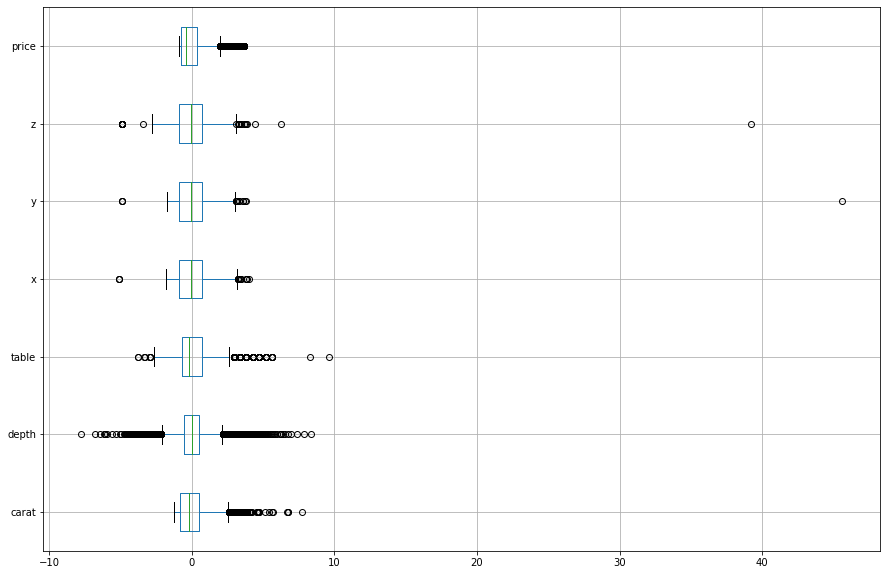

In [47]:
## Checking for Outliers
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
df[['carat', 'depth', 'table', 'x','y','z','price']].boxplot(vert=0)

In [48]:
#Bivariate Analysis

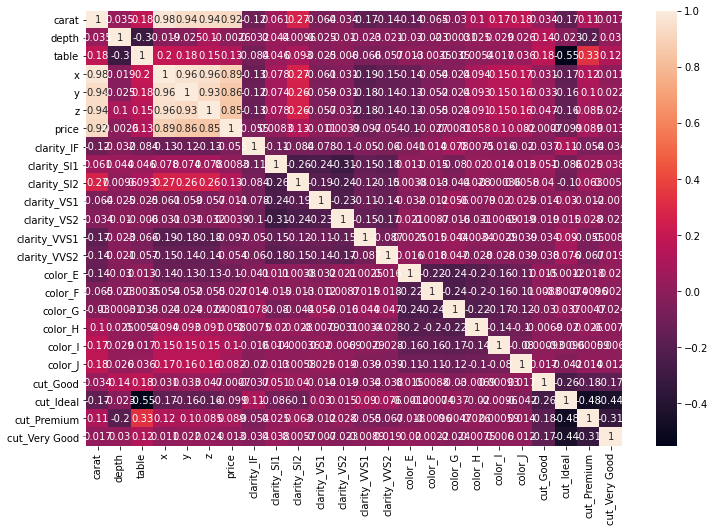

In [50]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [51]:
#Crossplots

<Figure size 1008x1008 with 0 Axes>

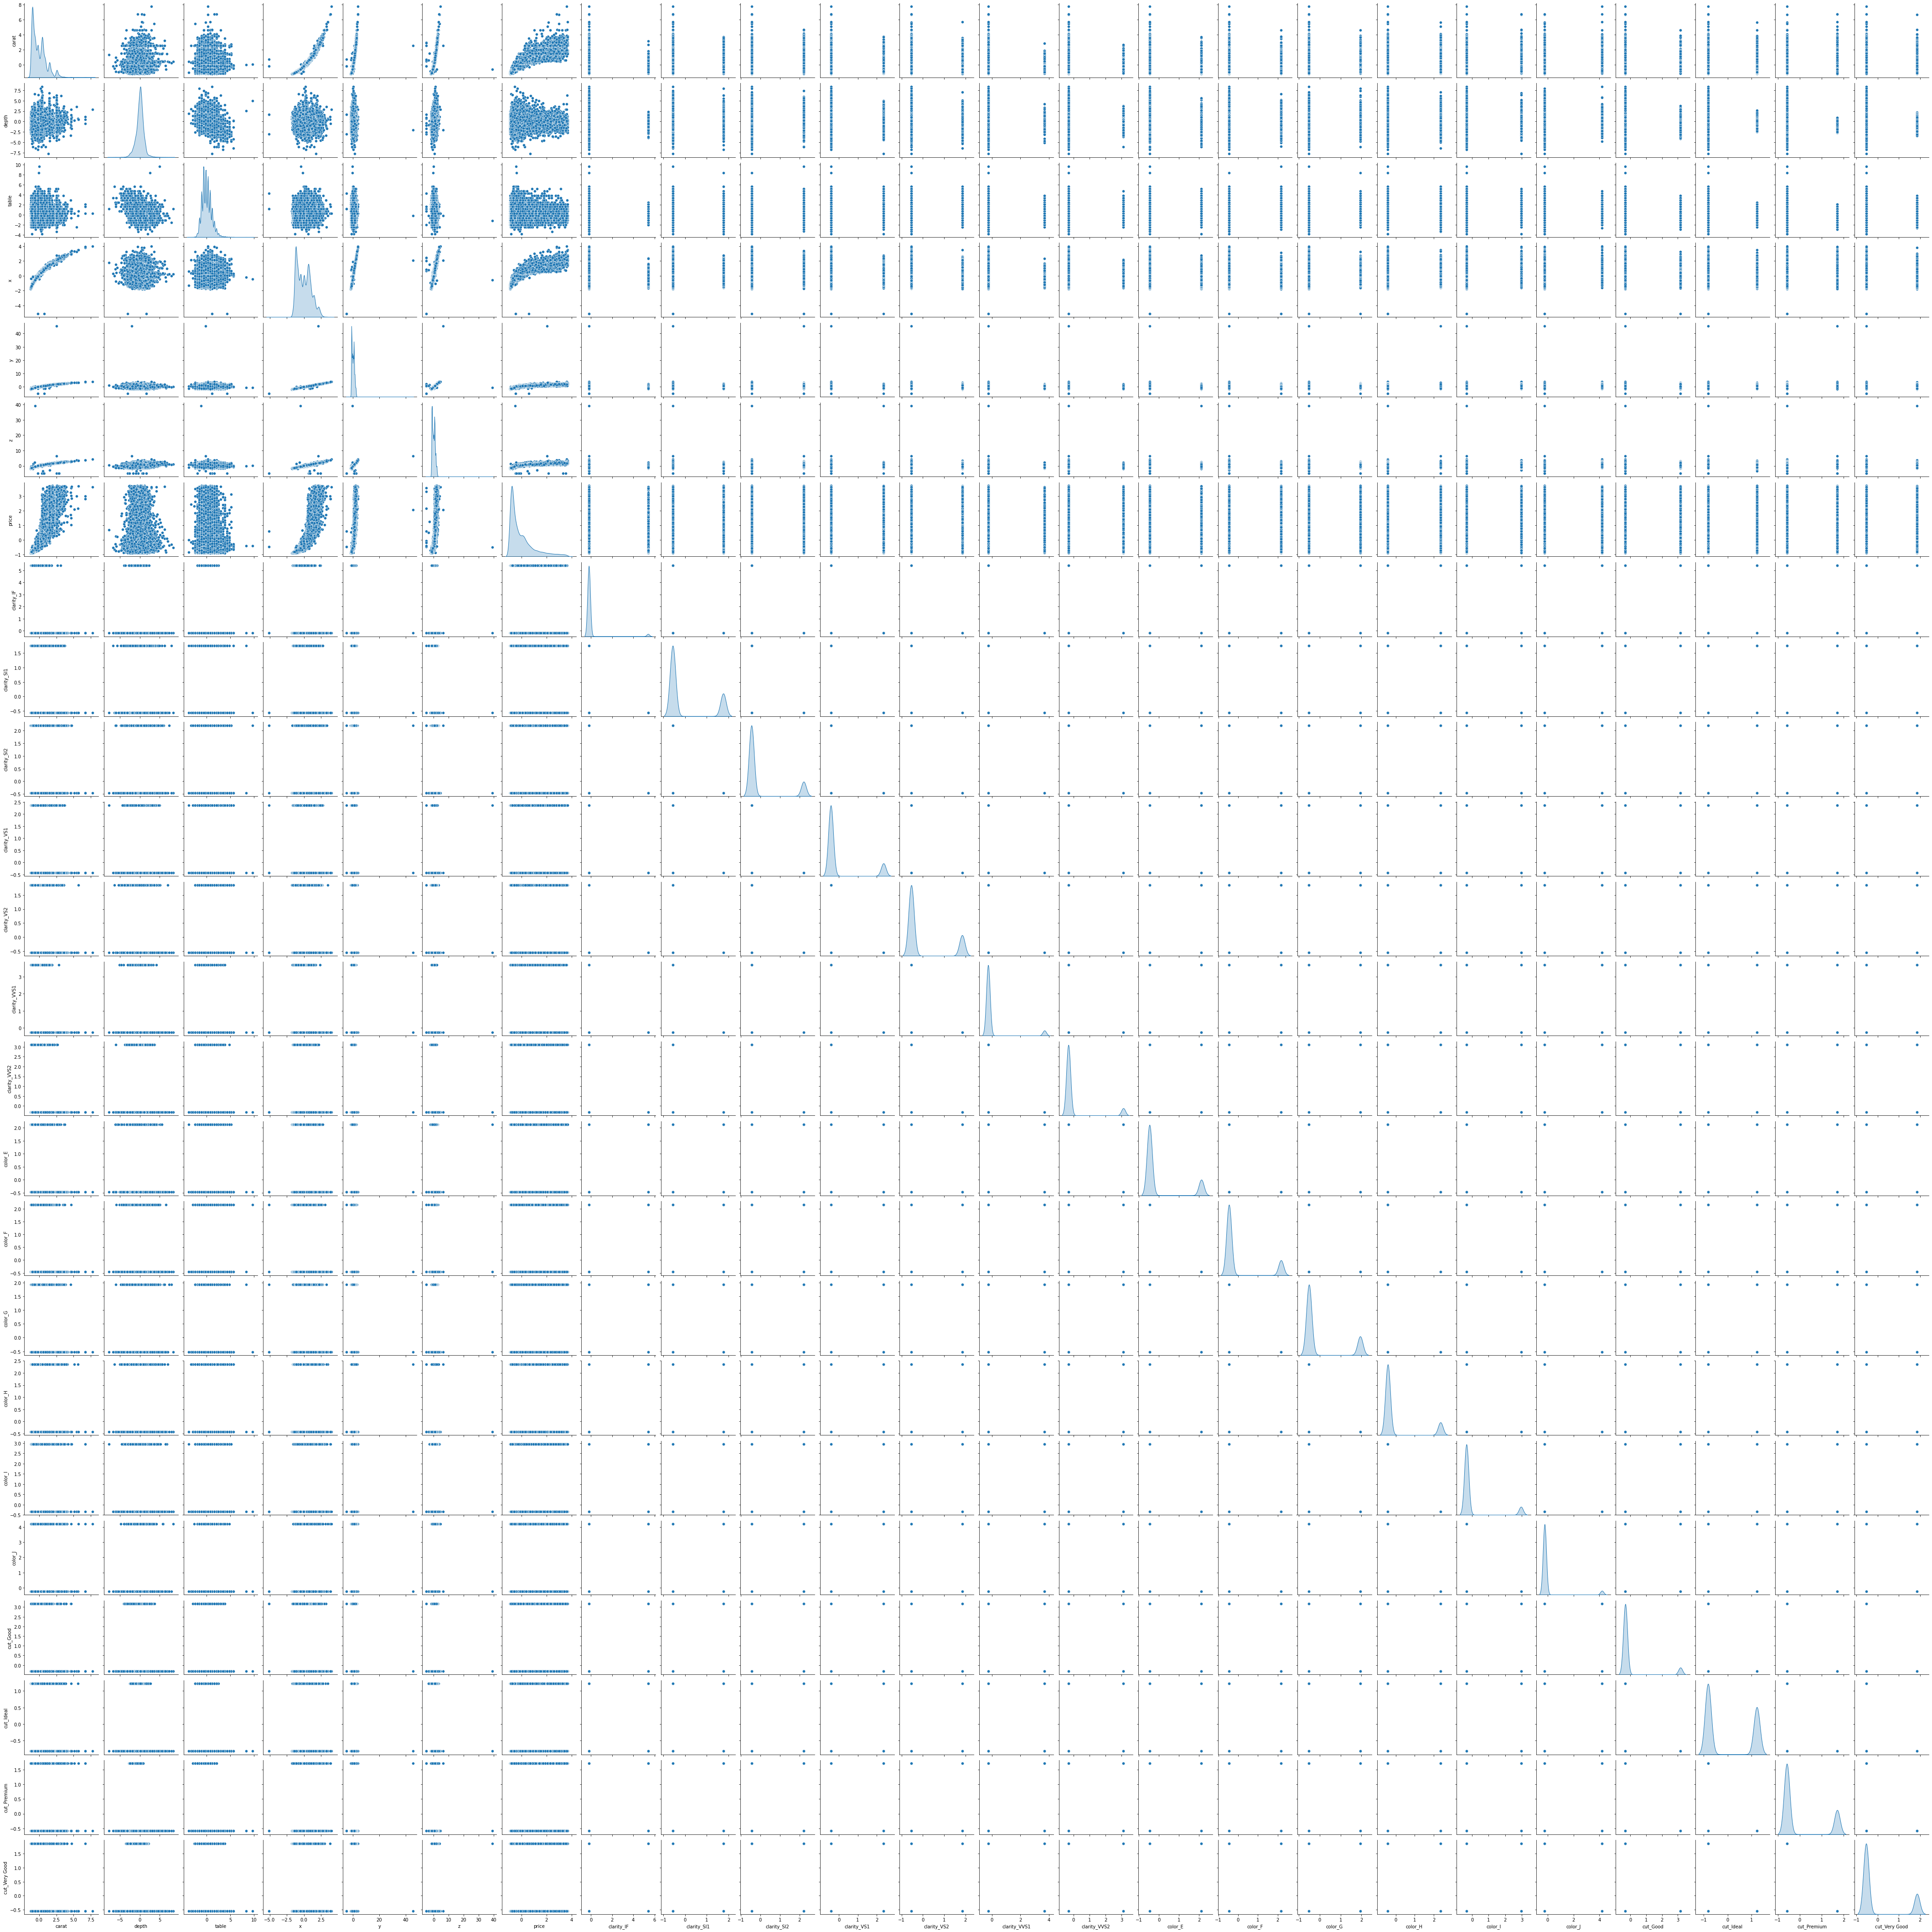

In [52]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

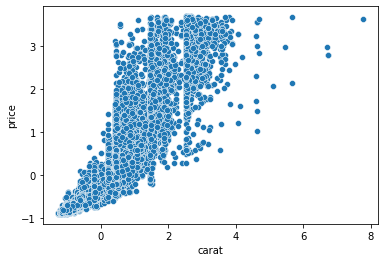

In [53]:
#A scatter plot can also be plotted for two columns

sns.scatterplot(df['carat'], df['price'])  

In [54]:
df.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416,-0.117610,0.060876,0.269706,...,-0.140539,-0.064898,-0.030212,0.100405,0.167207,0.180661,0.034240,-0.166237,0.111092,0.017006
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569,-0.032159,0.044206,0.009587,...,-0.029585,-0.022890,-0.000312,0.025230,0.029359,0.026351,0.140134,-0.022894,-0.198059,0.029909
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942,-0.083744,0.045848,0.092550,...,0.012876,-0.003534,-0.035119,0.005406,0.017066,0.035995,0.176351,-0.549924,0.330347,0.122110
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247,-0.129188,0.078033,0.273398,...,-0.136190,-0.054100,-0.023699,0.094391,0.152632,0.165098,0.031182,-0.166737,0.123490,0.011022
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243,-0.122238,0.073763,0.263607,...,-0.131145,-0.052284,-0.023720,0.092674,0.146565,0.158936,0.033118,-0.156225,0.104682,0.022400
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536,-0.126770,0.078349,0.262162,...,-0.130336,-0.054788,-0.023724,0.090793,0.149747,0.162416,0.046597,-0.160893,0.085256,0.023823
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000,-0.055453,0.008269,0.129768,...,-0.101556,-0.027457,0.008091,0.057585,0.100084,0.082231,-0.000700,-0.098694,0.088682,0.012660
clarity_IF,-0.117610,-0.032159,-0.083744,-0.129188,-0.122238,-0.126770,-0.055453,1.000000,-0.105103,-0.083699,...,-0.040772,0.014285,0.078491,0.007505,-0.015596,-0.020099,-0.036761,0.107524,-0.053980,-0.033756
clarity_SI1,0.060876,0.044206,0.045848,0.078033,0.073763,0.078349,0.008269,-0.105103,1.000000,-0.256562,...,0.011383,-0.014607,-0.080261,0.019837,0.014166,0.013199,0.051242,-0.085569,0.025327,0.038287
clarity_SI2,0.269706,0.009587,0.092550,0.273398,0.263607,0.262162,0.129768,-0.083699,-0.256562,1.000000,...,0.003793,-0.012804,-0.044008,0.027535,-0.000360,0.005792,0.039903,-0.103000,0.063079,0.005691


<AxesSubplot:>

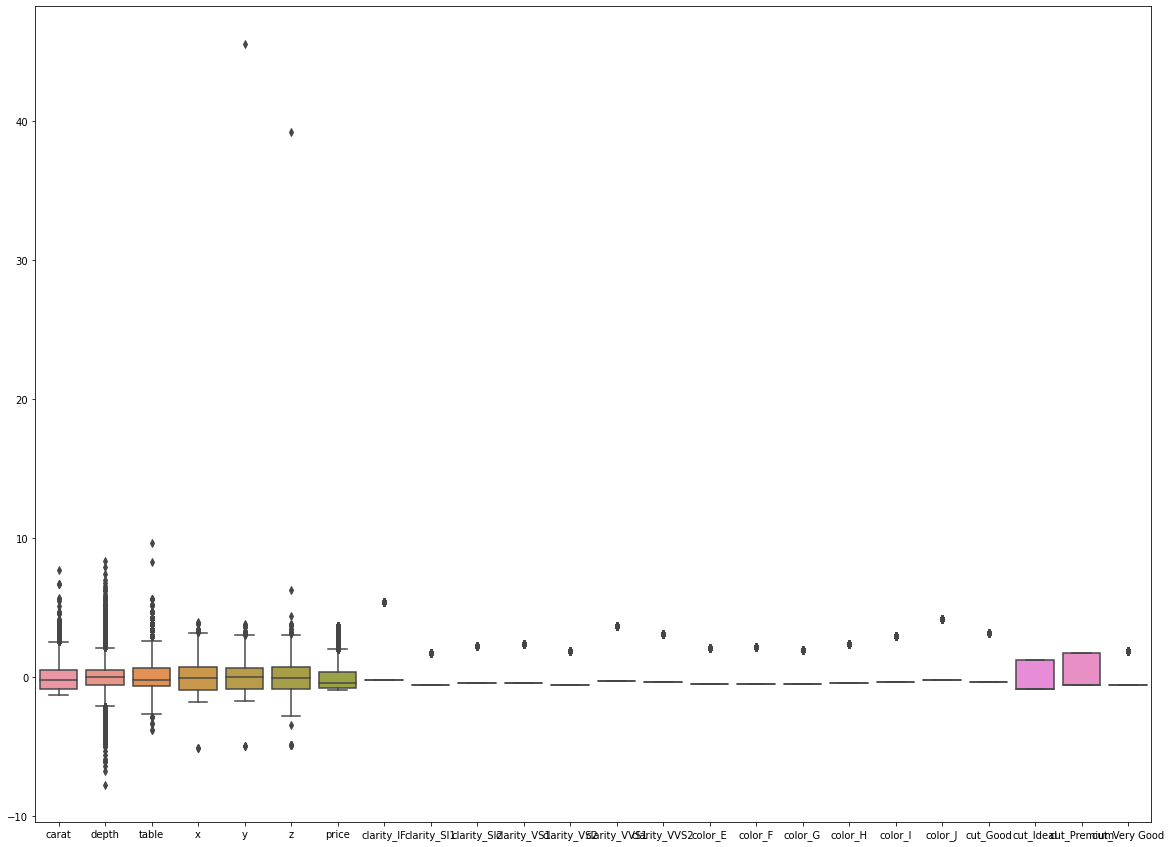

In [55]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)


In [56]:
#Carat vs Price

<AxesSubplot:xlabel='carat', ylabel='price'>

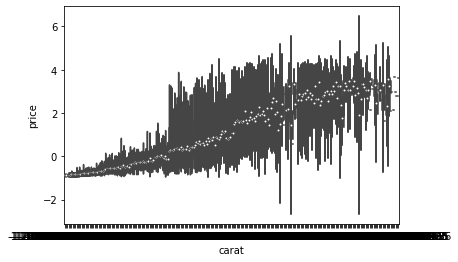

In [57]:
sns.violinplot(x='carat', y='price',data=df, size=8) # plots a violin plt

In [58]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

In [62]:
df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.043201,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,-0.185171,1.761801,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
1,-0.980405,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,5.400410,-0.567601,-0.452011,...,-0.472222,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663
2,0.212721,0.321944,1.139736,0.274832,0.331406,0.335747,0.583753,-0.185171,-0.567601,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368
3,-0.792017,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
4,-1.022269,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663


In [63]:
### Imputing missing values

In [64]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
dtype: int64

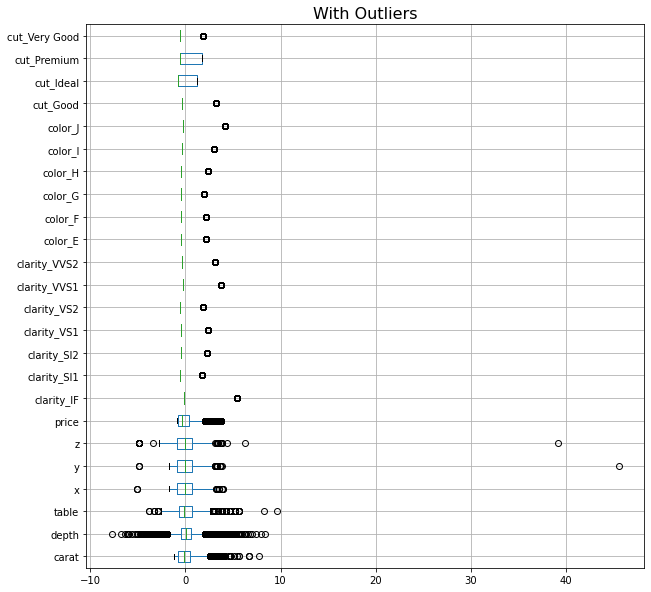

In [65]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='int64') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [66]:
df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.043201,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,-0.185171,1.761801,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
1,-0.980405,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,5.400410,-0.567601,-0.452011,...,-0.472222,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663
2,0.212721,0.321944,1.139736,0.274832,0.331406,0.335747,0.583753,-0.185171,-0.567601,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368
3,-0.792017,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
4,-1.022269,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663


In [67]:
df.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
clarity_IF       float64
clarity_SI1      float64
clarity_SI2      float64
clarity_VS1      float64
clarity_VS2      float64
clarity_VVS1     float64
clarity_VVS2     float64
color_E          float64
color_F          float64
color_G          float64
color_H          float64
color_I          float64
color_J          float64
cut_Good         float64
cut_Ideal        float64
cut_Premium      float64
cut_Very Good    float64
dtype: object

In [68]:
df.describe()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
count,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,...,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04
mean,-1.614017e-16,-5.598333e-15,-2.982727e-15,5.350331e-16,-8.057238e-16,-2.124932e-16,-2.910285e-17,1.199446e-15,-3.385713e-16,6.414649e-17,...,-1.071684e-15,6.842588e-16,-1.357982e-15,-7.677118e-16,7.389095e-16,1.543369e-15,-2.946762e-16,-1.083924e-15,-1.307236e-15,-9.059267e-16
std,1.000019e+00,9.870105e-01,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.252522e+00,-7.746948e+00,-3.788521e+00,-5.077427e+00,-4.917146e+00,-4.909807e+00,-8.978153e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,...,-4.722216e-01,-4.611442e-01,-5.154608e-01,-4.235574e-01,-3.384126e-01,-2.377710e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,-5.366627e-01
25%,-8.338809e-01,-4.566332e-01,-6.523577e-01,-9.037285e-01,-8.778193e-01,-8.854401e-01,-7.440185e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,...,-4.722216e-01,-4.611442e-01,-5.154608e-01,-4.235574e-01,-3.384126e-01,-2.377710e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,-5.366627e-01
50%,-2.059198e-01,3.882513e-02,-2.043343e-01,-3.531563e-02,-2.021276e-02,-2.505828e-02,-3.887204e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,...,-4.722216e-01,-4.611442e-01,-5.154608e-01,-4.235574e-01,-3.384126e-01,-2.377710e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,-5.366627e-01
75%,5.267015e-01,5.342834e-01,6.917124e-01,7.267610e-01,6.916007e-01,6.965523e-01,3.529332e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,...,-4.722216e-01,-4.611442e-01,-5.154608e-01,-4.235574e-01,-3.384126e-01,-2.377710e-01,-3.154791e-01,1.221986e+00,1.705528e+00,-5.366627e-01
max,7.748254e+00,8.390836e+00,9.652179e+00,3.987740e+00,4.559588e+01,3.921946e+01,3.696710e+00,5.400410e+00,1.761801e+00,2.212335e+00,...,2.117650e+00,2.168519e+00,1.940012e+00,2.360955e+00,2.954973e+00,4.205728e+00,3.169783e+00,1.221986e+00,1.705528e+00,1.863368e+00


In [69]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [70]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 24)
After (26933, 24)


In [71]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


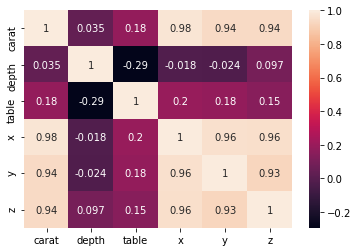

In [125]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [72]:
df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.043201,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,-0.185171,1.761801,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
1,-0.980405,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,5.400410,-0.567601,-0.452011,...,-0.472222,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663
2,0.212721,0.321944,1.139736,0.274832,0.331406,0.335747,0.583753,-0.185171,-0.567601,-0.452011,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368
3,-0.792017,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
4,-1.022269,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,-0.185171,-0.567601,-0.452011,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  float64
 7   clarity_IF     26933 non-null  float64
 8   clarity_SI1    26933 non-null  float64
 9   clarity_SI2    26933 non-null  float64
 10  clarity_VS1    26933 non-null  float64
 11  clarity_VS2    26933 non-null  float64
 12  clarity_VVS1   26933 non-null  float64
 13  clarity_VVS2   26933 non-null  float64
 14  color_E        26933 non-null  float64
 15  color_F        26933 non-null  float64
 16  color_G        26933 non-null  float64
 17  color_H        26933 non-null  float64
 18  color_

In [74]:
df.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
clarity_IF       float64
clarity_SI1      float64
clarity_SI2      float64
clarity_VS1      float64
clarity_VS2      float64
clarity_VVS1     float64
clarity_VVS2     float64
color_E          float64
color_F          float64
color_G          float64
color_H          float64
color_I          float64
color_J          float64
cut_Good         float64
cut_Ideal        float64
cut_Premium      float64
cut_Very Good    float64
dtype: object

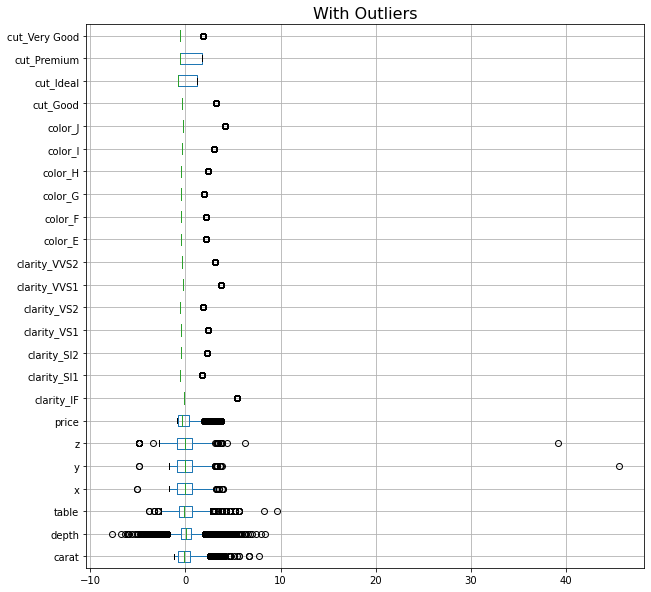

In [75]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

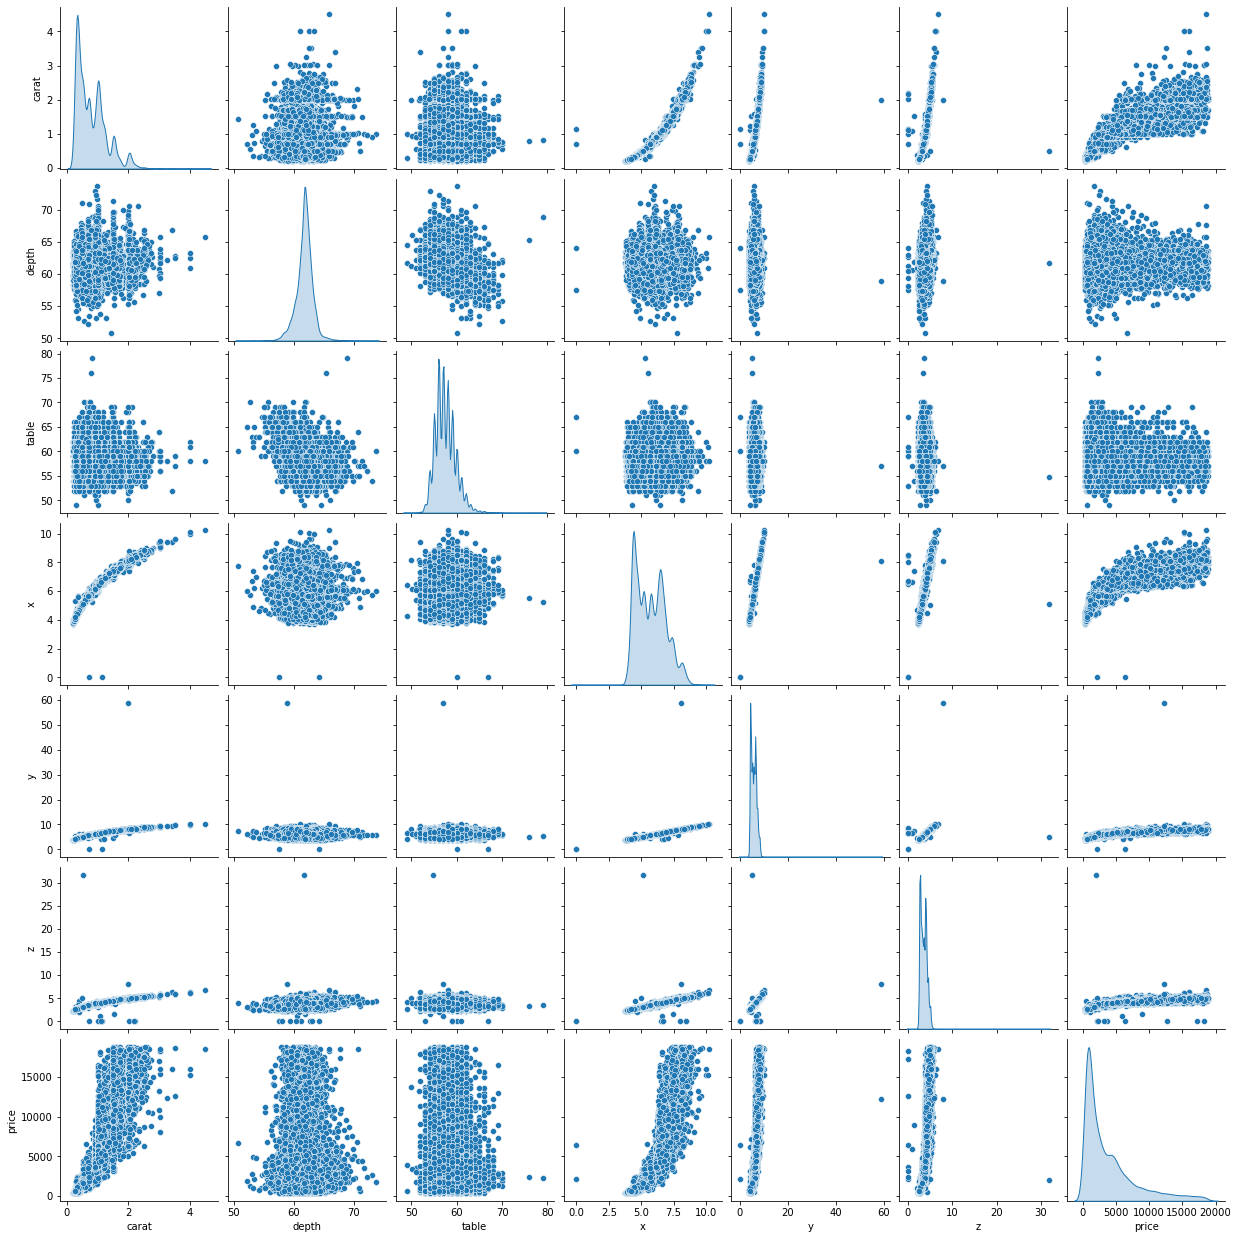

In [185]:
##Data distribution
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [76]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [78]:
X.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.043201,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.185171,1.761801,-0.452011,-0.423009,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
1,-0.980405,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,5.400410,-0.567601,-0.452011,-0.423009,...,-0.472222,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663
2,0.212721,0.321944,1.139736,0.274832,0.331406,0.335747,-0.185171,-0.567601,-0.452011,-0.423009,...,2.117650,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368
3,-0.792017,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.185171,-0.567601,-0.452011,2.364015,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663
4,-1.022269,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.185171,-0.567601,-0.452011,-0.423009,...,-0.472222,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663


In [79]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [80]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.365030203786186
The coefficient for depth is -0.023069760237642848
The coefficient for table is -0.014365930579177141
The coefficient for x is -0.30483090761975556
The coefficient for y is -0.0005008578248760746
The coefficient for z is -0.008691717253573695
The coefficient for clarity_IF is 0.23077317784370802
The coefficient for clarity_SI1 is 0.37307302118444785
The coefficient for clarity_SI2 is 0.23425013364482739
The coefficient for clarity_VS1 is 0.39336362273297465
The coefficient for clarity_VS2 is 0.4263510882806275
The coefficient for clarity_VVS1 is 0.30425117243137434
The coefficient for clarity_VVS2 is 0.3490284755542154
The coefficient for color_E is -0.017906799829878032
The coefficient for color_F is -0.026879523498390578
The coefficient for color_G is -0.04987669546741833
The coefficient for color_H is -0.08989231236088113
The coefficient for color_I is -0.11471397821107573
The coefficient for color_J is -0.13438254487853646
The coeffici

In [82]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0007206966099733243


In [98]:
# R square on training data
regression_model.score(X_train, y_train)

0.920320786060236

92% of the variation in the price is explained by the predictors in the model for train set

In [84]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9231836232612014

In [99]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.28119973781203883

In [86]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.27907833729429893

### Linear Regression using statsmodels


In [87]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,price
22114,-0.959473,0.463504,1.139736,-1.169569,-1.109373,-1.079720,-0.185171,-0.567601,-0.452011,-0.423009,...,-0.461144,-0.515461,2.360955,-0.338413,-0.237771,-0.315479,-0.818340,-0.586329,1.863368,-0.845390
2275,-1.043201,-0.385853,-1.100381,-1.222737,-1.220862,-1.232368,-0.185171,-0.567601,-0.452011,-0.423009,...,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663,-0.769113
19183,-0.624561,0.534283,-0.204334,-0.566997,-0.586233,-0.510758,-0.185171,1.761801,-0.452011,-0.423009,...,-0.461144,1.940012,-0.423557,-0.338413,-0.237771,-0.315479,1.221986,-0.586329,-0.536663,-0.670723
5030,0.631362,1.100521,-0.652358,0.709038,0.725905,0.849201,-0.185171,-0.567601,2.212335,-0.423009,...,-0.461144,-0.515461,-0.423557,-0.338413,-0.237771,3.169783,-0.818340,-0.586329,-0.536663,0.031177
25414,0.463905,-0.456633,2.035782,0.717900,0.648720,0.613290,-0.185171,-0.567601,2.212335,-0.423009,...,2.168519,-0.515461,-0.423557,-0.338413,-0.237771,-0.315479,-0.818340,1.705528,-0.536663,0.029190


In [100]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'price'],
      dtype='object')

In [101]:
expr= 'price ~ carat + depth + table + x + y+ z + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + color_E + color_F + color_G + color_H + color_I + color_J + cut_Good + cut_Ideal + cut_Premium '

In [90]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       0.000874
carat           1.368532
depth          -0.032034
table          -0.021599
x              -0.311495
y               0.001442
z              -0.007998
clarity_IF      0.236097
clarity_SI1     0.386350
clarity_SI2     0.244738
clarity_VS1     0.404134
clarity_VS2     0.439223
clarity_VVS1    0.312102
clarity_VVS2    0.358173
color_E        -0.017787
color_F        -0.027395
color_G        -0.050002
color_H        -0.089983
color_I        -0.114550
color_J        -0.134714
cut_Good       -0.003103
cut_Ideal       0.017091
cut_Premium     0.008379
dtype: float64

In [91]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9800.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:27:15   Log-Likelihood:                -2908.2
No. Observations:               18853   AIC:                             5862.
Df Residuals:                   18830   BIC:                             6043.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0009      0.002      0.425   

In [92]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [93]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2823296664254408

In [94]:
np.sqrt(lm1.mse_resid) #another way

0.28250204031373216

In [95]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

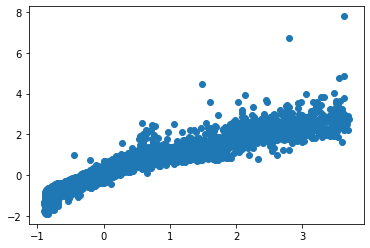

In [96]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [97]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.37) * carat + (-0.03) * depth + (-0.02) * table + (-0.31) * x + (0.0) * y + (-0.01) * z + (0.24) * clarity_IF + (0.39) * clarity_SI1 + (0.24) * clarity_SI2 + (0.4) * clarity_VS1 + (0.44) * clarity_VS2 + (0.31) * clarity_VVS1 + (0.36) * clarity_VVS2 + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.11) * color_I + (-0.13) * color_J + (-0.0) * cut_Good + (0.02) * cut_Ideal + (0.01) * cut_Premium + 